In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [25]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()

for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [26]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6123 entries, 1995-01-03 to 2019-04-29
Data columns (total 4 columns):
PG      6123 non-null float64
MSFT    6123 non-null float64
F       6123 non-null float64
GE      6123 non-null float64
dtypes: float64(4)
memory usage: 239.2 KB
None


In [27]:
print(mydata.tail())

                    PG        MSFT      F    GE
Date                                           
2019-04-23  103.160004  125.440002   9.50  9.33
2019-04-24  103.690002  125.010002   9.57  9.32
2019-04-25  103.279999  129.149994   9.40  9.12
2019-04-26  105.860001  129.889999  10.41  9.57
2019-04-29  104.779999  129.770004  10.32  9.73


In [28]:
print(mydata.head())

                  PG      MSFT         F        GE
Date                                              
1995-01-03  6.482779  2.718300  3.357222  2.740008
1995-01-04  6.430812  2.738060  3.447551  2.740008
1995-01-05  6.339871  2.692897  3.417441  2.746723
1995-01-06  6.352861  2.738060  3.417441  2.733292
1995-01-09  6.326881  2.721123  3.477660  2.706429


# Normalization to 100

Normalization helps set a point of reference for our data. This allows us to compare different assets as if they all started off at the same point (i.e. they all started from 100)

$$ \frac {P_{t}} {P_{0}} * 100 $$

In [36]:
# .iloc[{index}] gives you the first row of the dataframe based on index (index 0 is first row etc.)
# .loc['{label}'] gives you the row corrosponding with the passed in label ('1995-1-1' gives you the first row)
mydata.iloc[0]

PG      6.482779
MSFT    2.718300
F       3.357222
GE      2.740008
Name: 1995-01-03 00:00:00, dtype: float64

In [30]:
print(mydata.tail().iloc[0])

PG      103.160004
MSFT    125.440002
F         9.500000
GE        9.330000
Name: 2019-04-23 00:00:00, dtype: float64


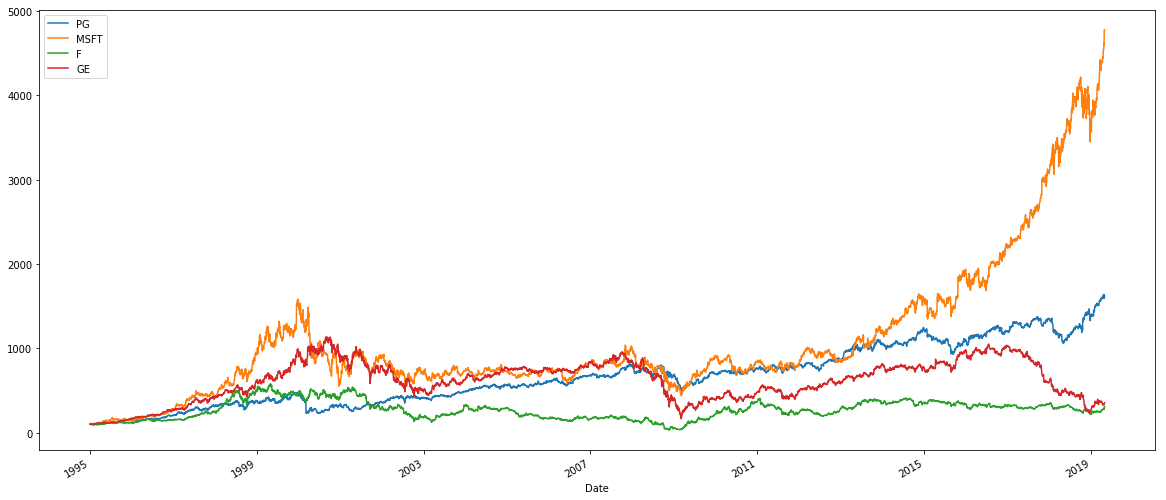

In [35]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(20, 9));

## Calculating the Return of a Portfolio of Securities

In [37]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004089,-0.006186,0.017621,-0.009828


In [40]:
weights = np.array([0.25, 0.25, 0.25, 0.25])  

In [41]:
# .dot is the dot product of returns and weights 
np.dot(returns, weights)

array([        nan,  0.00653974, -0.00922981, ..., -0.00251498,
        0.04687485, -0.00076316])

In [45]:
# we must first calculate the average return of a stock THEN apply the dot product which will gives us the
# weighted return
annual_returns = returns.mean() * 250
annual_returns

PG      0.138538
MSFT    0.207004
F       0.123914
GE      0.096738
dtype: float64

In [61]:
np.dot(annual_returns, weights)

0.14154866493757726

In [74]:
pfolio_1 = str(round(np.dot(annual_returns, weights) * 100, 3)) + '%'
print(pfolio_1)

14.155%


In [77]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [78]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2) * 100, 3)) + '%'
print(pfolio_1)
print(pfolio_2)

14.155%
16.164%
